In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.visual as mvis
import ipywidgets as widgets

Tolentino Juarez Alexander

In [2]:

def conduccion_1ds(K,S,L,TA,TB,N,W):
    """"
    Parameters
    ----------
    L: Float
    L es la longitud del dominio
    
    k: float
    es la conductividad del material
    
    S: float
    Es la fuente
    
    TA: float
    Es la condición de frontera  ala izquierda
    
    TB: float
    Es la condición de frontera a la derecha
    
    N: int
    Es el número de nodos internos (grados de libertad)
    
    Return
    ------
    Al final esta función dibuja la solución
    
    """
    #L=.6
    #K=0.3
    #S=5
    #TA=50
    #TB=65
    #N = 13
    h = L / (N+1)
    #W = 2.5 * np.pi
    
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = K / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0]=2 - (W**2/r)
    A[0,1]=-1
    for i in range (1,N-1):
        A[i,i]=2 -  (W**2/r)
        A[i,i+1]=-1
        A[i,i-1]=-1
    
    A[-1,-2]=-1
    A[-1,-1]=2 - (W**2/r)

    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T,'o-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    

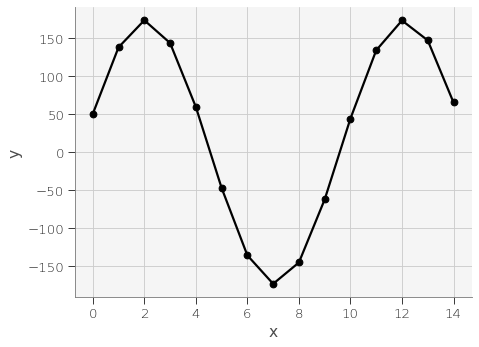

In [3]:
conduccion_1ds(0.3,5,.6,50,65,13,2.5 * np.pi)

In [4]:
w = widgets.interactive(conduccion_1ds, 
                        K=widgets.fixed(0.3), 
                        S=widgets.fixed(0), 
                        L=widgets.fixed(.6), 
                        TA=widgets.fixed(50), 
                        TB=widgets.fixed(65), 
                        N=widgets.IntSlider(max=20, min=8, value=4),
                        W= widgets.fixed(2.5 * np.pi))

In [5]:
display(w)

interactive(children=(IntSlider(value=8, description='N', max=20, min=8), Output()), _dom_classes=('widget-int…

## Calcular los coeficiente de la aproximacion
### Ejercicio 1.3

$$
D_{3l}f^\prime = {A f_{i+1} + B f_i + C f_{i-1} + D f_{i-2}}
$$

Realizando los càlculos llegamos: 
$$ A+B+C+D=0 $$
$$ -A + 2D+C = 1/h $$
$$ A + 4D + C = 0 $$
$$ -A + 8D + C = 1/h $$

In [6]:
N=4
B= np.zeros(N)
V= np.zeros((N,N))
R= np.zeros(N)
V[:1]=1
V[0,1]=1
V[-1,-1]=8
V[1,0]=-1
V[2,0]=1
V[3,0]=-1
V[1,2]=1
V[2,2]=1
V[3,2]=1
V[1,3]=2
V[2,3]=4
R[1]=-1
R[3]=1

B[0:N] = np.linalg.solve(V,R)

In [7]:
B

array([ 0.16666667,  1.        , -1.5       ,  0.33333333])


Los valores de los coeficientes serian:
$A = 1/6 h$, $B = 1$, $C = -1/2h  - 1 $, $D = 2/6h$, quedaria respectivamente como:


$$
f^\prime = \frac{f_{i+1} + 6 f_{i+1} + (3-6h) f_{i-1}+ 2f_{i-2}}{6h}
$$